# MLfajnySIECIneuronoweMOCNErzeczyTUTAJtwojaSTARAliteralniePAN

In [98]:
import csv 
import pandas as pd 
import numpy as np 

In [73]:
def generateRandomInt(mini, maks): 
  return np.random.randint(mini, maks)

def generateRandomFloat(mini, maks): 
  return np.random.uniform(mini, maks) 


DATA_CNT = 10000

FILE = "data.csv"
headers = [ 
  "Populacja", 
  "Koordynat x", 
  "Koordynat y", 
  "Powierzchnia", 
  "Procent dzieci", 
  "Procent mlodziez", 
  "Procent doroslych", 
  "Procent emerytow", 
  "Procent mezczyzn", 
  "Procent ludzi z wyksztalceniem wyzszym", 
  "Pieniadze wydane na marketing", 
  "Pieniadze zarobione"
  ]

with open(FILE, mode="w", newline="") as file: 
  writer = csv.writer(file) 
  writer.writerow(headers) 
  for i in range(DATA_CNT): 
    row = [] 
    row.append(generateRandomInt(1, 1800000)) # populacja
    row.append(generateRandomFloat(0, 100)) # koordynat x
    row.append(generateRandomFloat(0, 100)) # koordynat y
    row.append(generateRandomInt(3, 500)) # powierzchnia
    kid_percent = generateRandomFloat(0, 0.5)
    teen_percent = generateRandomFloat(0, 0.5-kid_percent)
    adult_percent = generateRandomFloat(0, 0.5)
    pensioner_percent = generateRandomFloat(0, 0.5-adult_percent)
    row.append(kid_percent) # procent dzieci
    row.append(teen_percent) # procent mlodziezy
    row.append(adult_percent) # procent doroslych
    row.append(pensioner_percent) # procent emerytow
    row.append(generateRandomFloat(0, 0.6)) # procent mezczyzn
    row.append(generateRandomFloat(0, 0.4)) # procent ludzi z wyksztalceniem wyzszym
    row.append(generateRandomInt(100, 1000)) # procent ludzi z wyksztalceniem wyzszym
    row.append(generateRandomInt(1000, 10000)) # pieniadze wydane na marketing
    writer.writerow(row) 




In [101]:
df = pd.read_csv('data2.csv') 

y = df['Pieniadze zarobione']
X = df.drop(columns=['Pieniadze zarobione'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

KeyError: 'Pieniadze zarobione'

In [95]:
model = models.Sequential([ 
    layers.InputLayer(shape=(X_train.shape[1],)), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(1) 
])


model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error']) 



In [96]:
history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.2) 


Epoch 1/100


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 37000456.0000 - mean_absolute_error: 5503.0469 - val_loss: 36231272.0000 - val_mean_absolute_error: 5435.9536
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36861452.0000 - mean_absolute_error: 5486.5923 - val_loss: 36211508.0000 - val_mean_absolute_error: 5434.1265
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37433544.0000 - mean_absolute_error: 5538.7856 - val_loss: 36181316.0000 - val_mean_absolute_error: 5431.3345
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37196520.0000 - mean_absolute_error: 5520.8853 - val_loss: 36135648.0000 - val_mean_absolute_error: 5427.1108
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37074020.0000 - mean_absolute_error: 5505.7539 - val_loss: 36068760.0000 - val_mean_absolute_error: 5420.9194
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37252428.0000 - mean_absolute_error: 5528.8716 - val_loss: 35973604.0000 - val_mean_absolute_error: 5412.10

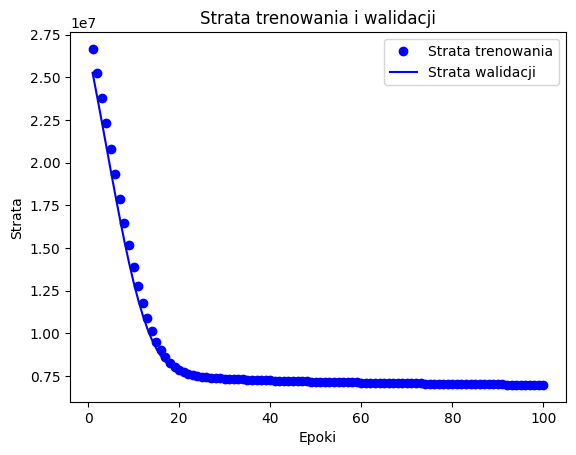

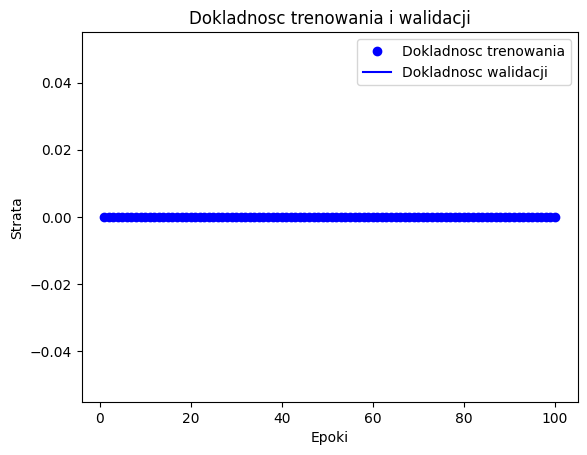

In [94]:
history_dict = history.history
# history_dict.keys()


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

# loss, mae = model.evaluate(X_test, y_test)
# print(f"Mean Absolute Error on test data: {mae}")